# Regularisation in Python

## Ridge Regression

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import scale
from sklearn import model_selection  # cross_validation
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [14]:
# plot in a separate (IPython) window:
# %matplotlib qt5  
# plot in the notebook:
%matplotlib inline  

In [15]:
#help(pd.get_dummies)

In [16]:
df = pd.read_csv('Hitters.csv').dropna().drop('Player', axis=1)
df.info()
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [17]:
pd.get_dummies(df[['League', 'Division', 'NewLeague']])

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0
6,0,1,1,0,1,0
7,1,0,0,1,1,0
8,0,1,0,1,0,1
9,1,0,1,0,1,0
10,1,0,1,0,1,0


In [18]:
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [19]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [20]:
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [21]:
# Made salary the (Y) variable since this is whatw we're predicting. played with the data to drop some columns in X_ and create 
# new X which is concatinated with dummies of 

y = df.Salary
# Drop the column with the independent variable (Salary), and columns for which we created dummy:
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
# Define the feature set X:
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 19 columns):
AtBat          263 non-null float64
Hits           263 non-null float64
HmRun          263 non-null float64
Runs           263 non-null float64
RBI            263 non-null float64
Walks          263 non-null float64
Years          263 non-null float64
CAtBat         263 non-null float64
CHits          263 non-null float64
CHmRun         263 non-null float64
CRuns          263 non-null float64
CRBI           263 non-null float64
CWalks         263 non-null float64
PutOuts        263 non-null float64
Assists        263 non-null float64
Errors         263 non-null float64
League_N       263 non-null uint8
Division_W     263 non-null uint8
NewLeague_N    263 non-null uint8
dtypes: float64(16), uint8(3)
memory usage: 35.7 KB


In [22]:
y.head()

1    475.0
2    480.0
3    500.0
4     91.5
5    750.0
Name: Salary, dtype: float64

In [23]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [24]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [25]:
#100 is how many decimal placess to include between each number or how one number is different from it's next and prior
np.linspace(10,-2,100)

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [26]:
# Creating a range of alphas 10 to -2. 10 to the power increases our range and gives us more values
alphas = 10**np.linspace(10,-2,100)*0.5
alphas
#np.linspace(10,-2,100)*0.5

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

## Make a Ridge Regression Model (Regularised Regression)
- Try different values of alpha to compare the affect on the weights

In [30]:
#running the ridge regression 100 times with different alpha values

ridge = Ridge(normalize=True)  # normalize=True ensures all variables on same scale
coefs = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
np.shape(coefs)

(100, 19)

Text(0,0.5,'Coefficient weights')

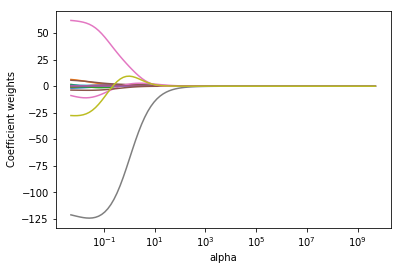

In [31]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficient weights')

In [32]:
# Use the cross-validation package to split data into training and test sets:
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=1)

# fit a ridge regression model on the training set, and evaluate its MSE on the test set, using lambda = 4:
ridge2 = Ridge(alpha=0.8, normalize=True)
ridge2.fit(X_train, y_train) # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test) # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2)) # Calculate the test MSE
print(r2_score(y_test, pred2))

AtBat           0.032352
Hits            0.765027
HmRun           0.293502
Runs            0.758304
RBI             1.233999
Walks           1.884313
Years           1.863111
CAtBat          0.007928
CHits           0.049225
CHmRun          0.461494
CRuns           0.101274
CRBI            0.116223
CWalks          0.103262
PutOuts         0.248420
Assists        -0.017311
Errors         -0.096515
League_N       16.048258
Division_W    -81.666388
NewLeague_N    10.435605
dtype: float64
99564.72872544378
0.4238857612031799


In [49]:
# least squares is ridge regression with alpha = 0:
ridge2 = Ridge(alpha=2, normalize=True)
ridge2.fit(X_train, y_train) # Fit a ridge regression on the training data
pred = ridge2.predict(X_test) # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred)) # Calculate the test MSE

AtBat           0.095483
Hits            0.572354
HmRun           1.273485
Runs            0.761803
RBI             1.032539
Walks           1.358682
Years           2.825317
CAtBat          0.009114
CHits           0.041540
CHmRun          0.345303
CRuns           0.085622
CRBI            0.089028
CWalks          0.098049
PutOuts         0.160009
Assists        -0.009137
Errors          0.242604
League_N        8.833488
Division_W    -50.482630
NewLeague_N     7.717820
dtype: float64
101008.14215548232


In [34]:
# try a huge value of alpha:
ridge3 = Ridge(alpha=10**10, normalize=True)
ridge3.fit(X_train, y_train) # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test) # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index=X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3)) # Calculate the test MSE

AtBat          1.317464e-10
Hits           4.647486e-10
HmRun          2.079865e-09
Runs           7.726175e-10
RBI            9.390640e-10
Walks          9.769219e-10
Years          3.961442e-09
CAtBat         1.060533e-11
CHits          3.993605e-11
CHmRun         2.959428e-10
CRuns          8.245247e-11
CRBI           7.795451e-11
CWalks         9.894387e-11
PutOuts        7.268991e-11
Assists       -2.615885e-12
Errors         2.084514e-10
League_N      -2.501281e-09
Division_W    -1.549951e-08
NewLeague_N   -2.023196e-09
dtype: float64
172862.23580379886


In [35]:
# use cross-validation to improve the ridge: This provide the best alpha. Note this is the training features
ridgecv = RidgeCV(scoring='neg_mean_squared_error', normalize=True, store_cv_values=True, alphas= np.linspace(0.1,10,10000))
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.5544554455445545

In [36]:
pd.Series(ridgecv.coef_, index=X.columns)

AtBat          -0.019494
Hits            0.876662
HmRun          -0.362460
Runs            0.717132
RBI             1.328568
Walks           2.116270
Years           1.117478
CAtBat          0.006479
CHits           0.052348
CHmRun          0.519104
CRuns           0.107376
CRBI            0.129722
CWalks          0.098224
PutOuts         0.283613
Assists        -0.017040
Errors         -0.342603
League_N       19.247733
Division_W    -93.253637
NewLeague_N     9.819410
dtype: float64

In [37]:
# test MSE?
ridge4 = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

99866.38834317635

In [52]:
# Finally, refit our ridge regression model on the full data set, using the value of alpha chosen by cross-validation, 
# and examine the coefficient estimates:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index=X.columns)

AtBat           0.055838
Hits            0.934879
HmRun           0.369048
Runs            1.092480
RBI             0.878259
Walks           1.717770
Years           0.783515
CAtBat          0.011318
CHits           0.061101
CHmRun          0.428333
CRuns           0.121418
CRBI            0.129351
CWalks          0.041990
PutOuts         0.179957
Assists         0.035737
Errors         -1.597699
League_N       24.774519
Division_W    -85.948661
NewLeague_N     8.336918
dtype: float64

In [38]:
# prepare arrays for plotting: y_d is the actual data. 
y_p = ridge4.predict(X)  # predicted response values over the entire data set
y_d = np.array(y)        # actual response values over the entire data set
e = y_d - y_p

Text(0,0.5,'predicted')

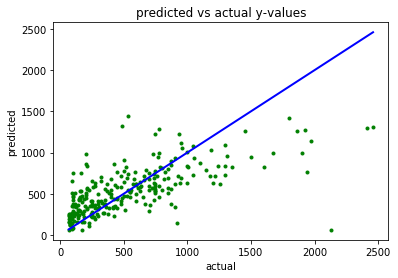

In [39]:
for i in range(y_p.shape[0]):
    plt.plot(y_d[i], y_p[i], 'o', color='green', markersize=3)
y_d12 = [y_d[0], y_d[y_d.shape[0] - 1]]
i1 = y_d.argmin()
i2 = y_d.argmax()
y_d12 = [y_d[i1], y_d[i2]]
plt.plot(y_d12, y_d12, c='blue', linewidth=2)
plt.title('predicted vs actual y-values')
plt.xlabel('actual')
plt.ylabel('predicted')

Text(0.5,0,'index')

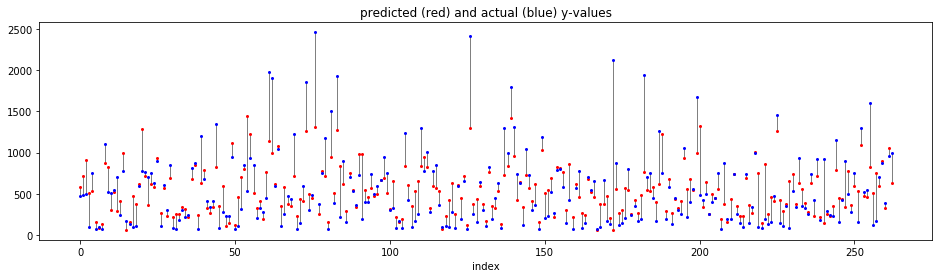

In [40]:
fig = plt.figure(figsize=[16,4])
for i in range(y_p.shape[0]):
    plt.plot([i, i], [y_d[i], y_p[i]], color='grey', linewidth=1)
    plt.plot(i, y_p[i], 'o', color='red', markersize=2)
    plt.plot(i, y_d[i], 'o', color='blue', markersize=2)
plt.title('predicted (red) and actual (blue) y-values')
plt.xlabel('index')

Text(0.5,0,'index')

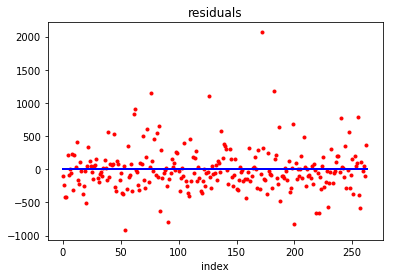

In [41]:
for i in range(y_p.shape[0]):
    plt.plot(i, e[i], 'o', color='red', markersize=3)
plt.plot([0, y_p.shape[0]], [0, 0], c='blue', linewidth=2)
plt.title('residuals')
plt.xlabel('index')

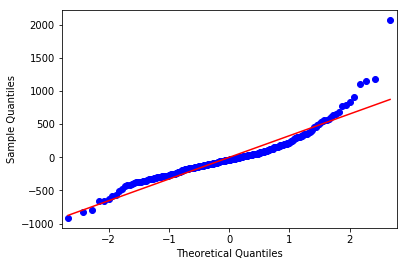

In [42]:
_ = sm.qqplot(e, line='s')    #: bug in statsmodels/IPython interface: suppress double-plot by capturing return value

## LASSO Regression

Text(0,0.5,'weights')

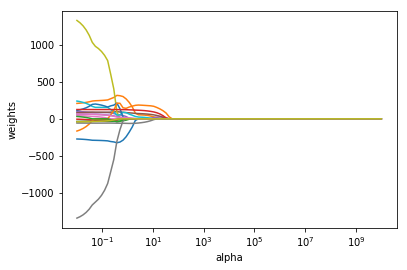

In [58]:
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [59]:
# perform 10-fold cross-validation to choose the best alpha, refit the model, and compute the associated test error:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

104960.65853895503

In [62]:
pd.Series(lasso.coef_, index=X.columns)

AtBat           0.000000
Hits            1.082446
HmRun           0.000000
Runs            0.000000
RBI             0.000000
Walks           2.906388
Years           0.000000
CAtBat          0.000000
CHits           0.000000
CHmRun          0.219367
CRuns           0.000000
CRBI            0.513975
CWalks          0.000000
PutOuts         0.368401
Assists        -0.000000
Errors         -0.000000
League_N        0.000000
Division_W    -89.064338
NewLeague_N     0.000000
dtype: float64